In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import seaborn as sns

In [2]:
#import csv and remove whitespace using strip()
df = pd.read_csv('supply_chain_data.csv',skipinitialspace = True,delimiter=',')
df.columns = df.columns.str.strip()
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [4]:
df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

<Axes: >

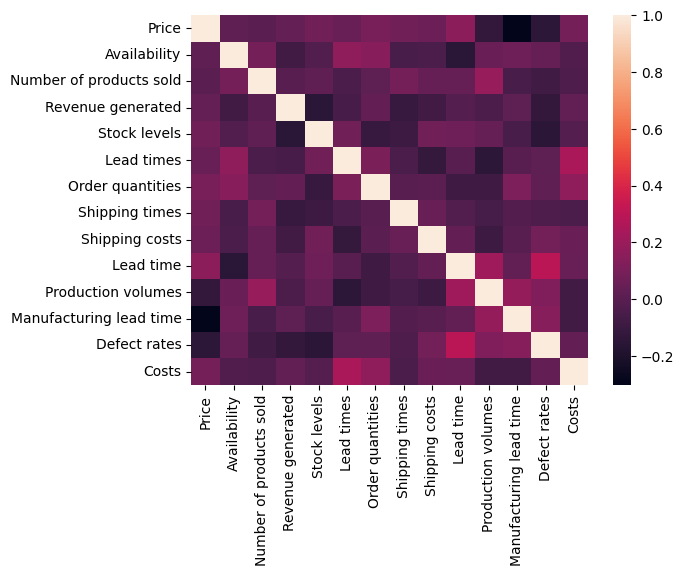

In [5]:
intfloat = df[['Price', 'Availability','Number of products sold','Revenue generated','Stock levels','Lead times',
            'Order quantities','Shipping times','Shipping costs','Lead time','Production volumes',
            'Manufacturing lead time','Defect rates','Costs']]
cormat = intfloat.corr()
sns.heatmap(cormat)

<Axes: >

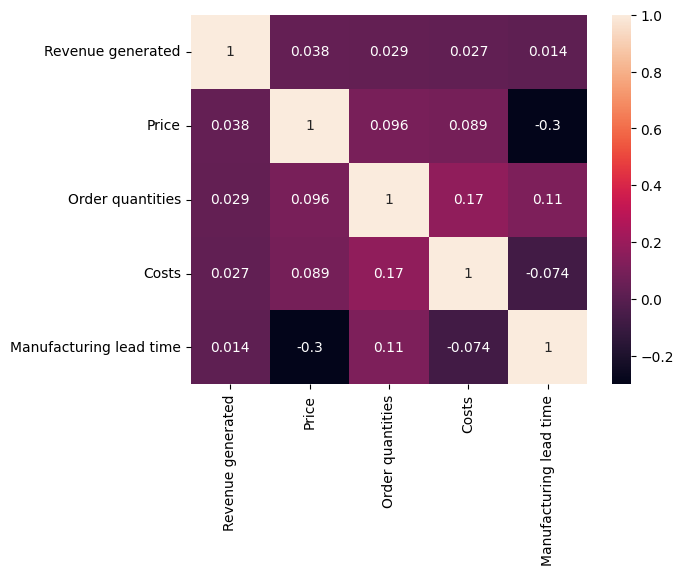

In [6]:
cols = cormat.nlargest(5, 'Revenue generated')['Revenue generated'].index
cm = np.corrcoef(intfloat[cols].values.T)
sns.heatmap(cm, annot=True, xticklabels=cols, yticklabels=cols)

In [7]:
fig = px.scatter(df, x='Price', 
                 y='Revenue generated', 
                 color='Product type', 
                 trendline="ols")
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

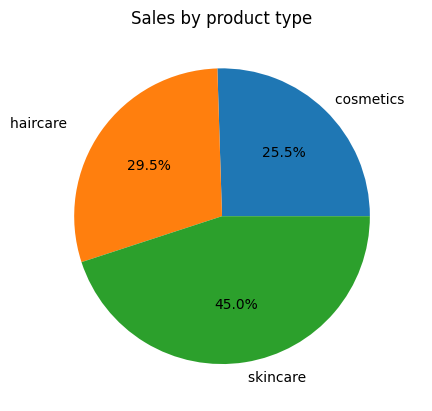

In [8]:
#Group by product type with number of products sold
type_sales = df.groupby('Product type')['Number of products sold'].sum().reset_index()

#pie chart
plt.pie(type_sales['Number of products sold'], labels = type_sales['Product type'], autopct='%1.1f%%')
plt.title('Sales by product type')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

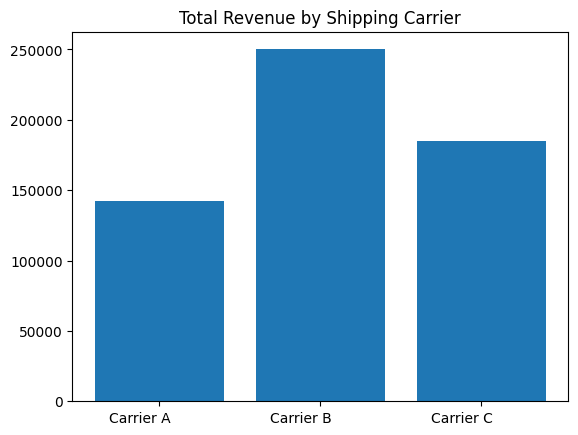

In [9]:
#group by Revenue generated by Shipping carriers
ship_revenue = df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

plt.bar(ship_revenue['Shipping carriers'], ship_revenue['Revenue generated'])
plt.title('Total Revenue by Shipping Carrier')
plt.show

In [10]:
avg_lead_time = df.groupby('Product type')['Lead time'].mean().reset_index()
avg_manu_cost = df.groupby('Product type')['Manufacturing costs'].mean().reset_index()
avg_lead_manu = pd.merge(avg_lead_time, avg_manu_cost, on='Product type')
avg_lead_manu.rename(columns={'Lead time':'Average lead tine', 'Manufacturing cost':'Average manufacturing cost'}, inplace=True)
avg_lead_manu

,Product type,Average lead tine,Manufacturing costs
0,cosmetics,13.538462,43.052740
1,haircare,18.705882,48.457993
2,skincare,18.000000,48.993157


<function matplotlib.pyplot.show(close=None, block=None)>

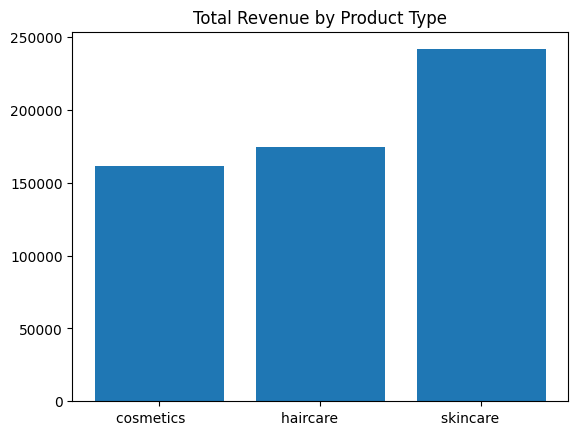

In [15]:
type_revenue = df.groupby('Product type')['Revenue generated'].sum().reset_index()

plt.bar(type_revenue['Product type'], type_revenue['Revenue generated'])
plt.title('Total Revenue by Product Type')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

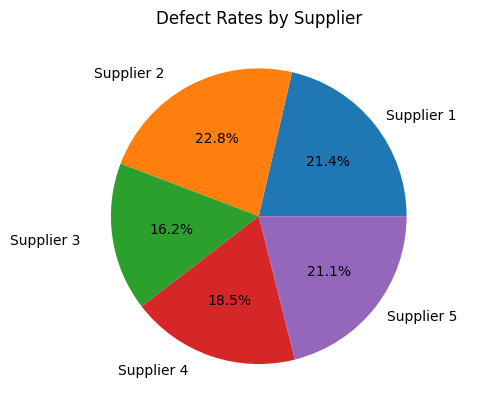

In [18]:
supplier_defect = df.groupby('Supplier name')['Defect rates'].sum().reset_index()

plt.pie(supplier_defect['Defect rates'], labels = supplier_defect['Supplier name'], autopct='%1.1f%%')
plt.title('Defect Rates by Supplier')
plt.show

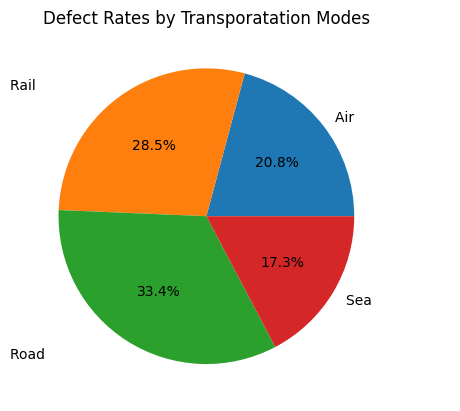

In [20]:
transport_defect = df.groupby('Transportation modes')['Defect rates'].sum().reset_index()

plt.pie(transport_defect['Defect rates'], labels=transport_defect['Transportation modes'], autopct='%1.1f%%')
plt.title('Defect Rates by Transporatation Modes')
plt.show()